# Modeling implicit bias with Fuzzy Cognitive Maps


Used data from Nápoles et al. (2022) article

Github link: https://github.com/LisaKouts/Implicit_bias_FCMs

In [1]:
import sys
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7} 
sns.set_context('paper', font_scale=2.5, rc=paper_rc)
                   
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""Sigmoid transfer function"""
def sigmoid(A, l=1, h=0):
    return 1.0 / (1.0 + np.exp(-l*(A-h)))

"""Hyperbolic transfer function"""
def hyperbolic(A):
    return np.tanh(A)

"""Rescaled transfer function"""
def rescaled(A):
    if la.norm(A)==0.0:
        return np.zeros(A.shape)
    else:
        return A / la.norm(A)

"""Recurrent reasoning process"""
def reasoning(W, A, T=50, phi=0.8, plot=True, indexes=[0,12], case="age", function=rescaled):
    
    states = np.zeros([len(A), T, len(W)])
    states[:,0,:] = A
    
    for t in range(1,T):
        A = states[:,t,:] = (phi * function(np.matmul(A, W)) + (1-phi) * states[:,0,:])

    if plot:
        
        plt.figure(figsize=(6,4))
        
        for idx in indexes:
            for i in range(len(states)):
                val = plt.plot(states[i,:,idx], label=names[idx], marker='o')

                plt.xlabel(r'$t$', fontsize=14)
                plt.ylabel(r'$a_i^{(t)}$', fontsize=14)
                plt.ylim(0, 0.35)
        
        ax = plt.gca()
        ax.xaxis.get_major_locator().set_params(integer=True)
        plt.legend(loc='best')
        plt.margins(x=0)
        plt.show()        
    
        return A
    else:
        return states

#### Load the association matrix


In [3]:
import pandas as pd

# Read the CSV file
df = abs(pd.read_csv('(30-04-2024)_correlation_matrix_CPS_values.csv'))
print(df.columns)
# Convert DataFrame to NumPy array and reshape it
W0 = df.to_numpy().reshape(len(df.columns), len(df.columns))

# Get the column names
names = df.columns.tolist()


Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16'],
      dtype='object')


In [4]:
print(names)

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16']


#### Simulations


### Scenario analysis - bias against Sex

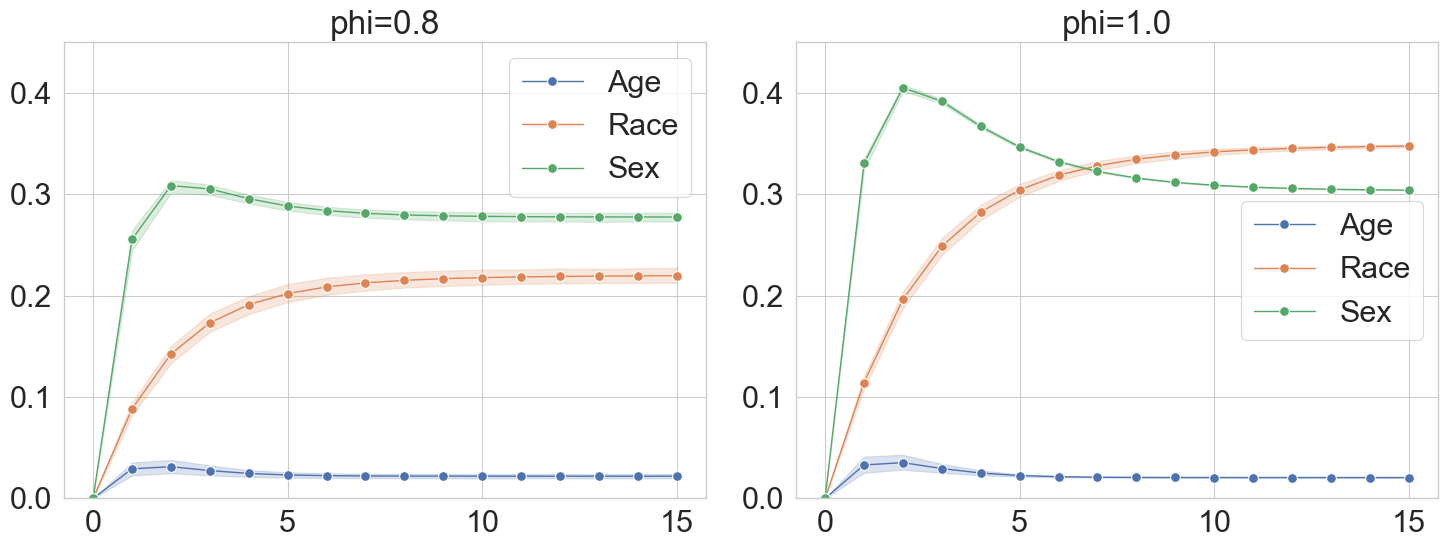

In [5]:
case = "Sex"
phi_values = [0.8, 1.0]
fig, ax= plt.subplots(1, 2, figsize=(15, 6))
grid = [ax[0], ax[1]]

for i in range(len(phi_values)):
    
    df = pd.DataFrame(columns=["feature","iteration","value"])
    
    for k in range(20):
        
        f6 = np.random.uniform(0.0,1.0)
        f7 = np.random.uniform(0.0,1.0)
        f8 = np.random.uniform(0.0,1.0)
        f11 = np.random.uniform(0.0,1.0)
        
        A = np.array([[0, 0, 0, 0, 0, f6, f7,f8, 0, 0, f11, 0, 0, 0, 0, 0]])
        
        state = reasoning(W0, A, phi=phi_values[i], T=16, plot=False)
        #11/12 or 13/14
        data_age = state[0,:,0]
        data_race = state[0,:,11]
        data_gender = state[0,:,13]
        
        df1 = pd.DataFrame(columns=["feature","iteration","value"])
        df1["iteration"] = range(len(data_age))
        df1["value"] = data_age.tolist()
        df1["feature"] = "Age"
        
        df2 = pd.DataFrame(columns=["feature","iteration","value"])
        df2["iteration"] = range(len(data_race))
        df2["value"] = data_race.tolist()
        df2["feature"] = "Race"
        
        df3 = pd.DataFrame(columns=["var","iteration","value"])
        df3["iteration"] = range(len(data_gender))
        df3["value"] = data_gender.tolist()
        df3["feature"] = "Sex"
        
        df = pd.concat([df,df1,df2,df3], ignore_index=True)
    
    ax1 = sns.lineplot(data=df, x="iteration", y="value", hue="feature", ax=grid[i], marker='o')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    
    grid[i].set_title('phi=' + str(phi_values[i]))
    grid[i].set_ylabel(None)
    grid[i].set_xlabel(None)
    
    grid[i].set_ylim([0, 0.45])
    grid[i].legend(loc='best')
    plt.ylim(0, 0.45)
    
    fig.tight_layout()
    # plt.savefig('sex(28-04-2024).pdf', dpi = 300)

It is expected that Sex has larger activation values than Race or Age, since Sex highly corelates with the activated unprotected features. But in this circumstance, when phi equals to 1,  Race has the largest final activation values. This indicates that Race is equally or more important than Sex for the phi values of 1), and the activated unprotected features are implicitly related to Sex, and to a similar or higher extent as compared to Race. This indicates the presence of implicit bias against Sex and Race.

### Scenario analysis - bias against Race

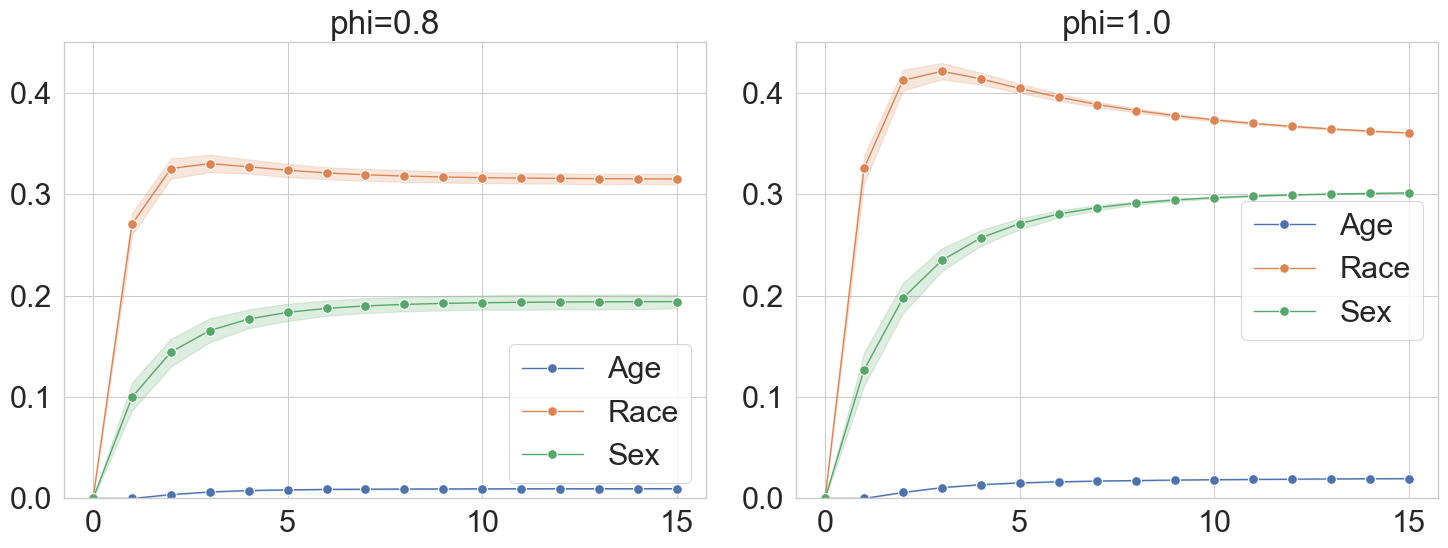

In [6]:
case = "Race"
phi_values = [0.8, 1.0]
fig, ax= plt.subplots(1, 2, figsize=(15, 6))
grid = [ax[0], ax[1]]

for i in range(len(phi_values)):
    
    df = pd.DataFrame(columns=["feature","iteration","value"])
    
    for k in range(20):
        
        f3 = np.random.uniform(0.0,1.0)
        f5 = np.random.uniform(0.0,1.0)
        f9 = np.random.uniform(0.0,1.0)
        f10 = np.random.uniform(0.0,1.0)
        f11 = np.random.uniform(0.0,1.0)
        f13 = np.random.uniform(0.0,1.0)
        
        A = np.array([[0, 0, f3, 0, f5, 0, 0, 0,f9, f10, f11, 0, f13, 0, 0, 0]])
        
        state = reasoning(W0, A, phi=phi_values[i], T=16, plot=False)

        data_age = state[0,:,0]
        data_race = state[0,:,11]
        data_gender = state[0,:,13]
        
        df1 = pd.DataFrame(columns=["feature","iteration","value"])
        df1["iteration"] = range(len(data_age))
        df1["value"] = data_age.tolist()
        df1["feature"] = "Age"
        
        df2 = pd.DataFrame(columns=["feature","iteration","value"])
        df2["iteration"] = range(len(data_race))
        df2["value"] = data_race.tolist()
        df2["feature"] = "Race"
        
        df3 = pd.DataFrame(columns=["feature","iteration","value"])
        df3["iteration"] = range(len(data_gender))
        df3["value"] = data_gender.tolist()
        df3["feature"] = "Sex"
        
        df = pd.concat([df,df1,df2,df3], ignore_index=True)
    
    ax1 = sns.lineplot(data=df, x="iteration", y="value", hue="feature", ax=grid[i], marker='o')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    
    grid[i].set_title('phi=' + str(phi_values[i]))
    grid[i].set_ylabel(None)
    grid[i].set_xlabel(None)
    
    grid[i].set_ylim([0, 0.45])
    grid[i].legend(loc='best')
    plt.ylim(0, 0.45)
    
    fig.tight_layout()
    # plt.savefig('race(28-04-2024).pdf', dpi = 300)

This figure shows than under all values of phi, the unprotected features encode more implicit bias related to Race compared to the amount of bias related to Sex or Age. But it could be said that 'Sex' can be seen as equally important and the activated unprotected features are implicitly related to 'Sex'. This indicates the presence of implicit bias against Sex and Race

### Scenario analysis - bias against Age

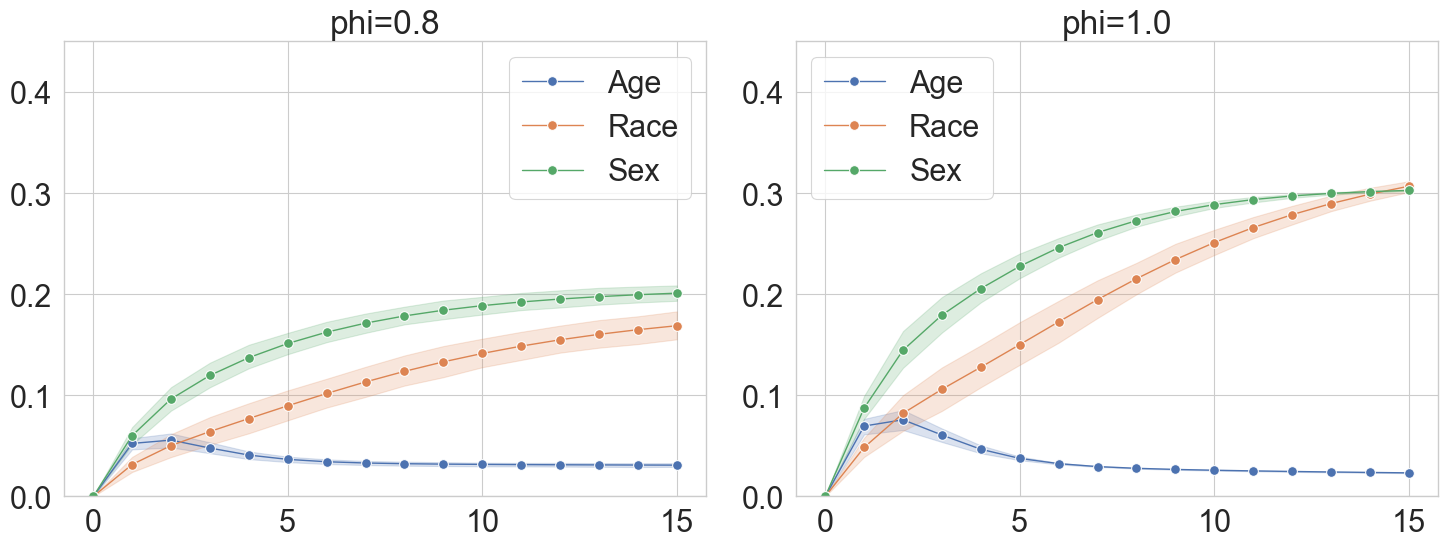

In [5]:
case = "Age"
phi_values = [0.8, 1.0]
fig, ax= plt.subplots(1, 2, figsize=(15, 6))
grid = [ax[0], ax[1]]

for i in range(len(phi_values)):
    
    df = pd.DataFrame(columns=["feature","iteration","value"])
    
    for k in range(20):

        f8 = np.random.uniform(0.0,1.0)
        f15 = np.random.uniform(0.0,1.0)
        f16 = np.random.uniform(0.0,1.0)
        
        A = np.array([[0, 0, 0, 0, 0, 0, 0, f8, 0, 0, 0, 0, 0, 0, f15, f16]])
        
        state = reasoning(W0, A, phi=phi_values[i], T=16, plot=False)

        data_age = state[0,:,0]
        data_race = state[0,:,11]
        data_gender = state[0,:,13]
        
        df1 = pd.DataFrame(columns=["feature","iteration","value"])
        df1["iteration"] = range(len(data_age))
        df1["value"] = data_age.tolist()
        df1["feature"] = "Age"
        
        df2 = pd.DataFrame(columns=["feature","iteration","value"])
        df2["iteration"] = range(len(data_race))
        df2["value"] = data_race.tolist()
        df2["feature"] = "Race"
        
        df3 = pd.DataFrame(columns=["feature","iteration","value"])
        df3["iteration"] = range(len(data_gender))
        df3["value"] = data_gender.tolist()
        df3["feature"] = "Sex"
        
        df = pd.concat([df,df1,df2,df3], ignore_index=True)
    
    ax1 = sns.lineplot(data=df, x="iteration", y="value", hue="feature", ax=grid[i], marker='o')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    
    grid[i].set_title('phi=' + str(phi_values[i]))
    grid[i].set_ylabel(None)
    grid[i].set_xlabel(None)
    
    grid[i].set_ylim([0, 0.45])
    grid[i].legend(loc='best')
    plt.ylim(0, 0.45)
    
    fig.tight_layout()
plt.savefig('age(28-04-2024).pdf', dpi = 300)

Due to the fact that Age correlated with a few (2) features, it supposes that the unprotected features are not implicitly biased against age, but in all circumstances more implicit biased against Sex and Race. 